# Cliff Walking

Consider the gridworld that have a 'cliff' where if the agent put the foot on, it will get a reward of -100.

This is a standard undiscounted, episodic task, with start and goal states, and the usual actions causing movement up, down, right, and left. Rewards is -1 on all transitions except those into the region marked as 'the cliff'. Stepping into this region incurs a reward of -100 and sends the agent instantly back to the start.

In [2]:
# Import the functions and libraries needed
from TD_methods import td_sarsa_control, q_learning_control, take_action
import numpy as np

This are the possible states in the gridworld:

* `0`: Where the agent can move.
* `1`: The Cliff.
* `2`: Where the agent can not move.
* `3`: Initial state.
* `4`: Final state.

In [3]:
# Let's create the gridworld
gridworld = np.array([
    [2, 2, 2, 2, 2, 2, 2 ,2, 2, 2, 2, 2, 2, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2],
    [2, 2, 2, 2, 2, 2 ,2, 2, 2, 2, 2, 2, 2, 2]
])

n, m = gridworld.shape

In [4]:
non_terminal_states=[]
terminal_states=[]
initial_states=[]
for i in range(n-1):
    for j in range(m):
        if gridworld[i, j] != 2:
            if gridworld[i, j] == 0 or gridworld[i, j] == 1:
                non_terminal_states.append((i, j))
            elif gridworld[i, j] == 3:
                initial_states.append((i, j))
                non_terminal_states.append((i, j))
            else:
                terminal_states.append((i, j))

In [5]:
actions={}
states = non_terminal_states + terminal_states
for state in states:
    actions[state] = [action for action in ['up', 'down', 'right', 'left']]

In [6]:
initial_Q = {}
for s in states:
    initial_Q[s] = {}
    for a in actions[s]:
        initial_Q[s][a] = 0

In [7]:
def next_step_cliff_walking(state, action):

    def is_valid(position):
        i, j = position
        if gridworld[i, j] == 0 or gridworld[i, j] == 3 or gridworld[i, j] == 4:
            return True
        return False
    
    def is_cliff(position):
        i, j = position
        if gridworld[i, j] == 1:
            return True
        return False

    i, j = state

    # Aplica acción
    if action == 'up':
        i2, j2 = i - 1, j
    elif action == 'down':
        i2, j2 = i + 1, j
    elif action == 'right':
        i2, j2 = i, j + 1
    elif action == 'left':
        i2, j2 = i, j - 1
    else:
        raise ValueError("Acción inválida")

    # Verifica si el movimiento por acción es válido
    if not is_valid((i2, j2)):
        if is_cliff((i2, j2)):
            idx = np.random.randint(0, len(initial_states))
            return (initial_states[idx], -100)
        else:
            return (state, -1)

    return ((i2, j2), -1)


## Using Q-Learning to solve the problem

In [8]:
Q, policy = q_learning_control(non_terminal_states=non_terminal_states,
                 terminal_states=terminal_states,
                 initial_states=initial_states,
                 actions=actions,
                 next_step_fn=next_step_cliff_walking,
                 gamma=1.0,
                 alpha=0.2,
                 epsilon=0.1,
                 num_episodes=50000,
                 initial_Q=initial_Q)

In [9]:
state = initial_states[0]
actions_optimal_path_q_learning = []
states_optimal_path_q_learning = [state]
while True:
    action = take_action(state, Q, epsilon_greedy=False)
    actions_optimal_path_q_learning.append(action)
    state = next_step_cliff_walking(state, action)[0]
    states_optimal_path_q_learning.append(state)
    if state in terminal_states:
        break

## Using SARSA to solve the problem

In [14]:
Q, policy = td_sarsa_control(non_terminal_states=non_terminal_states,
                 terminal_states=terminal_states,
                 initial_states=initial_states,
                 actions=actions,
                 next_step_fn=next_step_cliff_walking,
                 gamma=1.0,
                 alpha=0.2,
                 epsilon=0.1,
                 num_episodes=5000,
                 initial_Q=initial_Q)

In [15]:
state = initial_states[0]
actions_optimal_path_sarsa = []
states_optimal_path_sarsa = [state]
while True:
    action = take_action(state, Q, epsilon_greedy=False)
    actions_optimal_path_sarsa.append(action)
    state = next_step_cliff_walking(state, action)[0]
    states_optimal_path_sarsa.append(state)
    if state in terminal_states:
        break

## Plotting the solutions

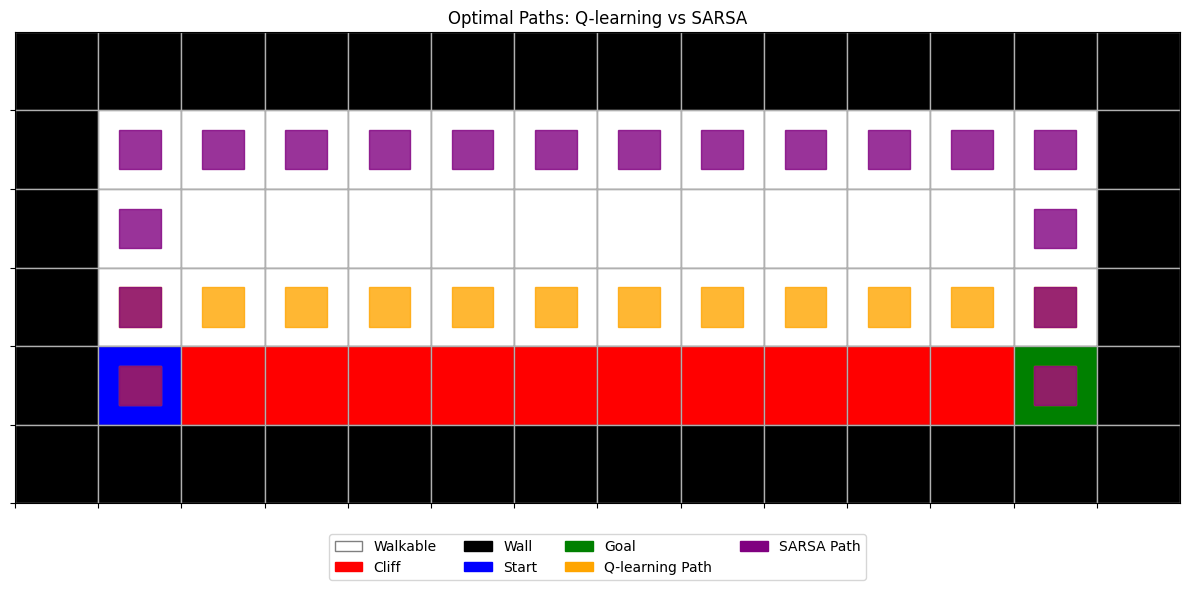

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Gridworld definition
gridworld = np.array([
    [2, 2, 2, 2, 2, 2, 2 ,2, 2, 2, 2, 2, 2, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2],
    [2, 2, 2, 2, 2, 2 ,2, 2, 2, 2, 2, 2, 2, 2]
])

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Define color map for the grid
cmap = {
    0: "white",    # walkable
    1: "red",      # cliff
    2: "black",    # wall
    3: "blue",     # start
    4: "green"     # goal
}

# Draw the grid
for i in range(gridworld.shape[0]):
    for j in range(gridworld.shape[1]):
        cell = gridworld[i, j]
        ax.add_patch(plt.Rectangle((j, gridworld.shape[0] - 1 - i), 1, 1, color=cmap[cell], ec='gray'))

# Draw Q-learning path
for (i, j) in states_optimal_path_q_learning:
    ax.add_patch(plt.Rectangle((j + 0.25, gridworld.shape[0] - 1 - i + 0.25), 0.5, 0.5, color='orange', alpha=0.8))

# Draw SARSA path
for (i, j) in states_optimal_path_sarsa:
    ax.add_patch(plt.Rectangle((j + 0.25, gridworld.shape[0] - 1 - i + 0.25), 0.5, 0.5, color='purple', alpha=0.8))

# Legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color="white", ec='gray', label="Walkable"),
    plt.Rectangle((0, 0), 1, 1, color="red", label="Cliff"),
    plt.Rectangle((0, 0), 1, 1, color="black", label="Wall"),
    plt.Rectangle((0, 0), 1, 1, color="blue", label="Start"),
    plt.Rectangle((0, 0), 1, 1, color="green", label="Goal"),
    plt.Rectangle((0, 0), 1, 1, color="orange", label="Q-learning Path"),
    plt.Rectangle((0, 0), 1, 1, color="purple", label="SARSA Path"),
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Grid and formatting
ax.set_xticks(np.arange(gridworld.shape[1]))
ax.set_yticks(np.arange(gridworld.shape[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True)
ax.set_xlim(0, gridworld.shape[1])
ax.set_ylim(0, gridworld.shape[0])
ax.set_title("Optimal Paths: Q-learning vs SARSA")

plt.tight_layout()
plt.show()


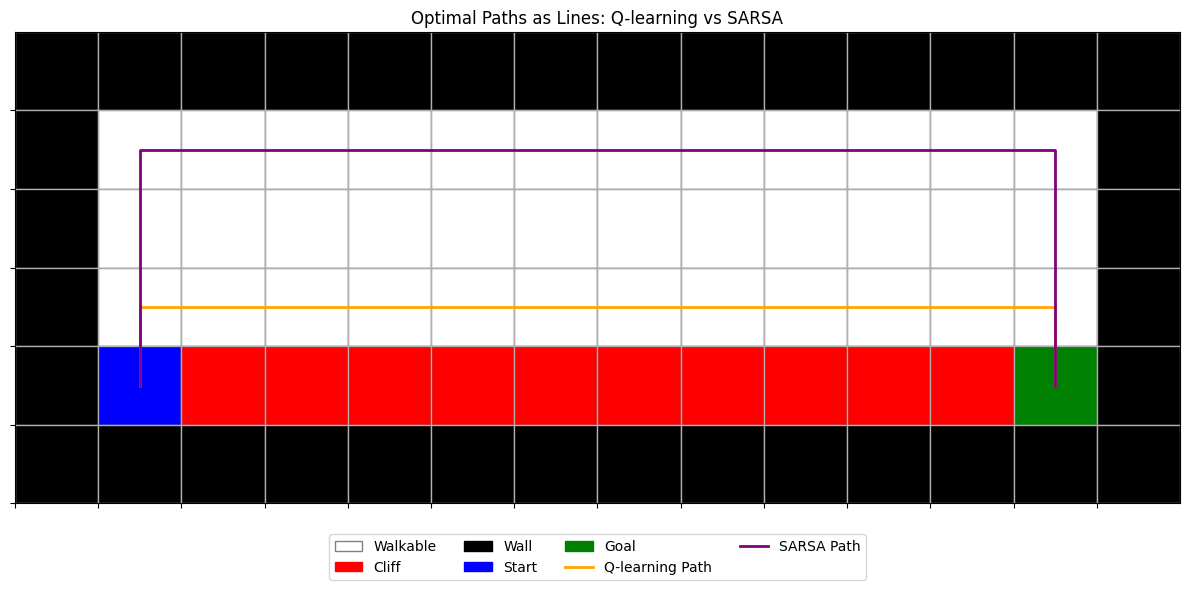

In [22]:
# Redibujo del grid con caminos como líneas finas

fig, ax = plt.subplots(figsize=(12, 6))

# Redibujar el grid
for i in range(gridworld.shape[0]):
    for j in range(gridworld.shape[1]):
        cell = gridworld[i, j]
        ax.add_patch(plt.Rectangle((j, gridworld.shape[0] - 1 - i), 1, 1, color=cmap[cell], ec='gray'))

# Función auxiliar para convertir coordenadas de celda a coordenadas de centro de celda
def cell_center(state):
    i, j = state
    return j + 0.5, gridworld.shape[0] - 1 - i + 0.5

# Dibujar el camino de Q-learning como línea
q_learning_path_coords = [cell_center(s) for s in states_optimal_path_q_learning]
q_x, q_y = zip(*q_learning_path_coords)
ax.plot(q_x, q_y, color='orange', linewidth=2, label='Q-learning Path')

# Dibujar el camino de SARSA como línea
sarsa_path_coords = [cell_center(s) for s in states_optimal_path_sarsa]
s_x, s_y = zip(*sarsa_path_coords)
ax.plot(s_x, s_y, color='purple', linewidth=2, label='SARSA Path')

# Leyenda y ajustes
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color="white", ec='gray', label="Walkable"),
    plt.Rectangle((0, 0), 1, 1, color="red", label="Cliff"),
    plt.Rectangle((0, 0), 1, 1, color="black", label="Wall"),
    plt.Rectangle((0, 0), 1, 1, color="blue", label="Start"),
    plt.Rectangle((0, 0), 1, 1, color="green", label="Goal"),
    plt.Line2D([0], [0], color="orange", linewidth=2, label="Q-learning Path"),
    plt.Line2D([0], [0], color="purple", linewidth=2, label="SARSA Path"),
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

ax.set_xticks(np.arange(gridworld.shape[1]))
ax.set_yticks(np.arange(gridworld.shape[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True)
ax.set_xlim(0, gridworld.shape[1])
ax.set_ylim(0, gridworld.shape[0])
ax.set_title("Optimal Paths as Lines: Q-learning vs SARSA")

plt.tight_layout()
plt.show()


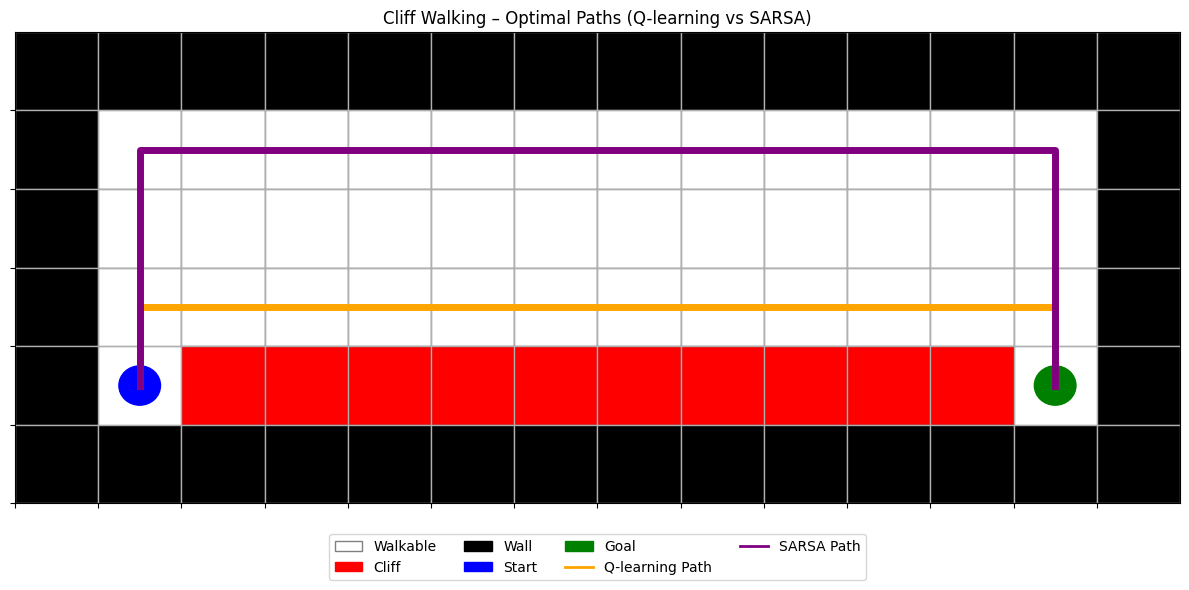

In [26]:
# Redibujo más limpio: caminos con líneas y estados especiales más pequeños

fig, ax = plt.subplots(figsize=(12, 6))

# Redibujar el grid base
for i in range(gridworld.shape[0]):
    for j in range(gridworld.shape[1]):
        cell = gridworld[i, j]
        if cell not in [3, 4]:  # omitimos start y goal para pintarlos más pequeños después
            ax.add_patch(plt.Rectangle((j, gridworld.shape[0] - 1 - i), 1, 1, color=cmap[cell], ec='gray'))

# Función auxiliar para convertir coordenadas de celda a centro
def cell_center(state):
    i, j = state
    return j + 0.5, gridworld.shape[0] - 1 - i + 0.5

# Dibujar caminos
q_learning_path_coords = [cell_center(s) for s in states_optimal_path_q_learning]
sarsa_path_coords = [cell_center(s) for s in states_optimal_path_sarsa]
q_x, q_y = zip(*q_learning_path_coords)
s_x, s_y = zip(*sarsa_path_coords)

ax.plot(q_x, q_y, color='orange', linewidth=5, label='Q-learning Path')
ax.plot(s_x, s_y, color='purple', linewidth=5, label='SARSA Path')

# Dibujar start y goal con marcadores más pequeños
for i in range(gridworld.shape[0]):
    for j in range(gridworld.shape[1]):
        if gridworld[i, j] == 3:
            x, y = cell_center((i, j))
            ax.add_patch(plt.Circle((x, y), 0.25, color='blue', label='Start'))
        elif gridworld[i, j] == 4:
            x, y = cell_center((i, j))
            ax.add_patch(plt.Circle((x, y), 0.25, color='green', label='Goal'))

# Leyenda y detalles
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color="white", ec='gray', label="Walkable"),
    plt.Rectangle((0, 0), 1, 1, color="red", label="Cliff"),
    plt.Rectangle((0, 0), 1, 1, color="black", label="Wall"),
    plt.Circle((0, 0), 0.25, color="blue", label="Start"),
    plt.Circle((0, 0), 0.25, color="green", label="Goal"),
    plt.Line2D([0], [0], color="orange", linewidth=2, label="Q-learning Path"),
    plt.Line2D([0], [0], color="purple", linewidth=2, label="SARSA Path"),
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Estética del grid
ax.set_xticks(np.arange(gridworld.shape[1]))
ax.set_yticks(np.arange(gridworld.shape[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True)
ax.set_xlim(0, gridworld.shape[1])
ax.set_ylim(0, gridworld.shape[0])
ax.set_title("Cliff Walking – Optimal Paths (Q-learning vs SARSA)")

plt.tight_layout()
plt.show()
